## **COMP-2704 (234311) Supervised Machine Learning**
## **Felix Cazarez**
## **EDA - Exploratory Data Analysis**
## Project: Stroke Prediction


## **Summary**
An accurate database was selected from Kaggle to predict future stroke attacks in patients. Ten features were chosen, with one dropped. The variables were divided into two groups, categorical and numerical, which contribute to the model as behavioural variables. During cleaning, 201 null values(4%) were replaced with the mean, and BMI dropped due to the weak correlation with the tag. One column had a label of positive or negative stroke and the label. Two features had imbalanced data and outliers but were kept and will be treated with resampling, class weighting or data augmentation to avoid loss of prediction accuracy. (100 words)




 





## ***Use Case:*** 
The prediction of strokes will be usefull for neurologist, cardiologist, hospitals, governments and patients to detect possible risk of stroke attack on time and treat this dangerous problem on time in a preventive maner. 
Than means savings in medical treatment for government, improve the population productivity ans a better quality of life for patients and people. 

The database was extracted from Kaggle from the attached source, special thank to Federico Soriano Palacios for de database. 

## DataBase Source:
  fedesoriano. (n.d.). Stroke prediction dataset. Kaggle. Retrieved January 22, 2023, from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import plotly as plt
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


### **Importing data set:**, this data set was extracted from this location in Kaggle: stroke-prediction-dataset, and it was uploaded to my Github to make it available anywhere.

In [ ]:
url = "https://raw.githubusercontent.com/Fcazarez/DSML/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url, encoding="unicode_escape")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Use describe and info to have an idea of the dataset

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### After this command missing values were found, we need to drop or fill with the mean 

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### **Missing Values Handling:** There are 201 null values in bmi. 3,93% of Dataframe, so we could delete with afecting prediction. Even though we can fill it with te mean to not loose any information.

In [ ]:
df.shape

(5110, 12)

In [ ]:
df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

### Verifying the shape of the data ti decide if drop or keep with them

In [ ]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### mean calculation is about 28.89

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace =True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Filling the null values with KNNImputer feature with k-Nearest Neighbors method from SciLearn

In [ ]:
imputer = KNNImputer(n_neighbors = 5)
df["bmi"]= imputer.fit_transform(df[["bmi"]])

In [ ]:
df["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **Verifying duplicated values:** 

In [ ]:
df.duplicated("id").sum()

0

### **Dimensionally reduction:** Id parameter is not needed, it could be drooped. Bmi was droped becouse the weak correlation. 

In [ ]:
df.drop("id",axis=1,inplace=True)
df.info()

KeyError: ignored

### Check the correlation of numerical values:

### Depict the correlations to a better appreciation. 

<ipython-input-19-1a86fb20af3d>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(corr, dtype=np.bool))


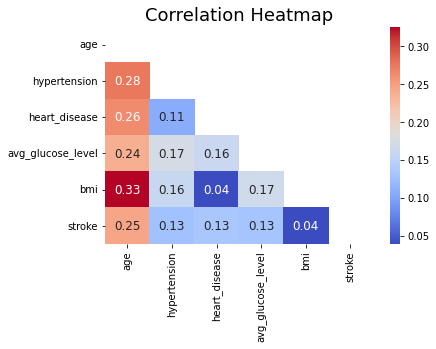

In [ ]:
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            cmap='coolwarm',
            annot=True,
            annot_kws={'size': 12},
            fmt=".2f",
            cbar=True,
            mask= np.triu(np.ones_like(corr, dtype=np.bool))
           )
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

### the correlation between the Tag (stroke) and bmi is too weak, better we drop it

In [ ]:
df.drop("bmi",axis=1,inplace=True)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


### **Remove outliers:**

In [ ]:

plt.rcParams["figure.figsize"]=(10, 10)

<Figure size 1440x720 with 0 Axes>

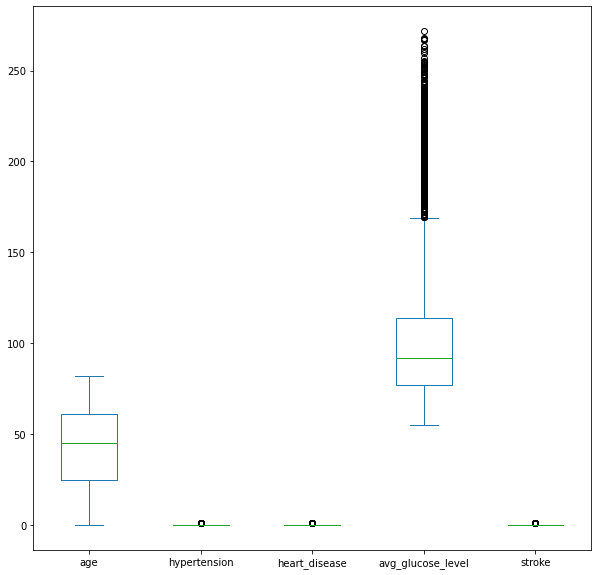

In [ ]:
plt.figure(figsize= (20,10))
df.plot(kind = "box")
plt.show()

### Explore the shape of glucose data 

In [ ]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

### Is not posssible to drop the outliers, so those are too many and we can affect the predictions

In [ ]:
df[df["avg_glucose_level"]>114.090000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1277 non-null   object 
 1   age                1277 non-null   float64
 2   hypertension       1277 non-null   int64  
 3   heart_disease      1277 non-null   int64  
 4   ever_married       1277 non-null   object 
 5   work_type          1277 non-null   object 
 6   Residence_type     1277 non-null   object 
 7   avg_glucose_level  1277 non-null   float64
 8   smoking_status     1277 non-null   object 
 9   stroke             1277 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 109.7+ KB


In [ ]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## **Features definition:**
### 1) **gender:** "Male", "Female" or "Other"
### 2) **age:** age of the patient
### 3) **hypertension:** 0 No, 1 Yes (If the patient has previous hypertention diagnosis of)
### 4) **heart_disease:** 0 = No, 1 = Yes (If the patient has previous heart attacks)
### 5) **ever_married:** "No" or "Yes"
### 6) **work_type:** "Govt_jov", "Never_worked", "Private" or "Self-employed" (If patient works for a prived institution, government, is independient employee or unemployed)
### 7) **Residence_type:** "Rural" or "Urban"
### 8) **avg_glucose_level:** average glucose level in blood (If the patient has previous diabetes diagnosis or high lebels of sugar in blood)
### 9) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### **Numerical features analysis:** age, hypertension, heart_disease, avg_glucose_level, are numerical, we can analyze those

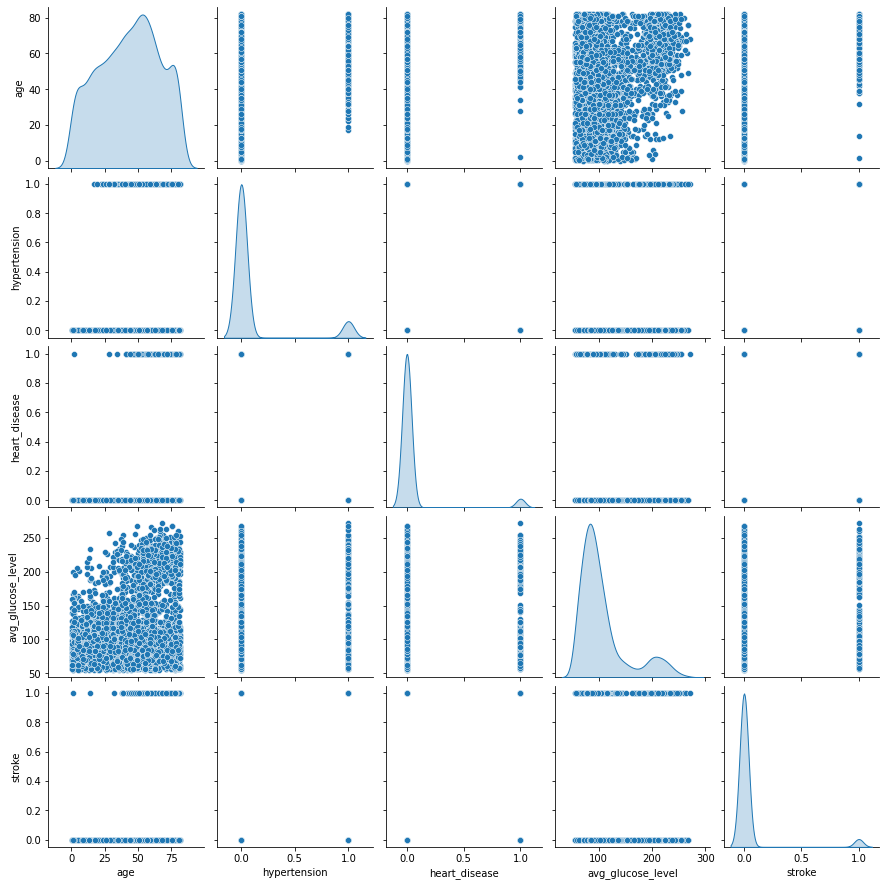

In [ ]:
sns.pairplot(df, kind='scatter', diag_kind='kde', markers=["o", "s", "D"])

In [ ]:
df_float = df[["age", "hypertension", "heart_disease", "avg_glucose_level", "stroke"]]
df_float.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
1,61.0,0,0,202.21,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1


### In General variables are bell shaped. Stroke is imbalanced as well as glucose, hypertension and hearth disease. 

### **Categorical features analysis:**

In [ ]:
df_categorical = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]

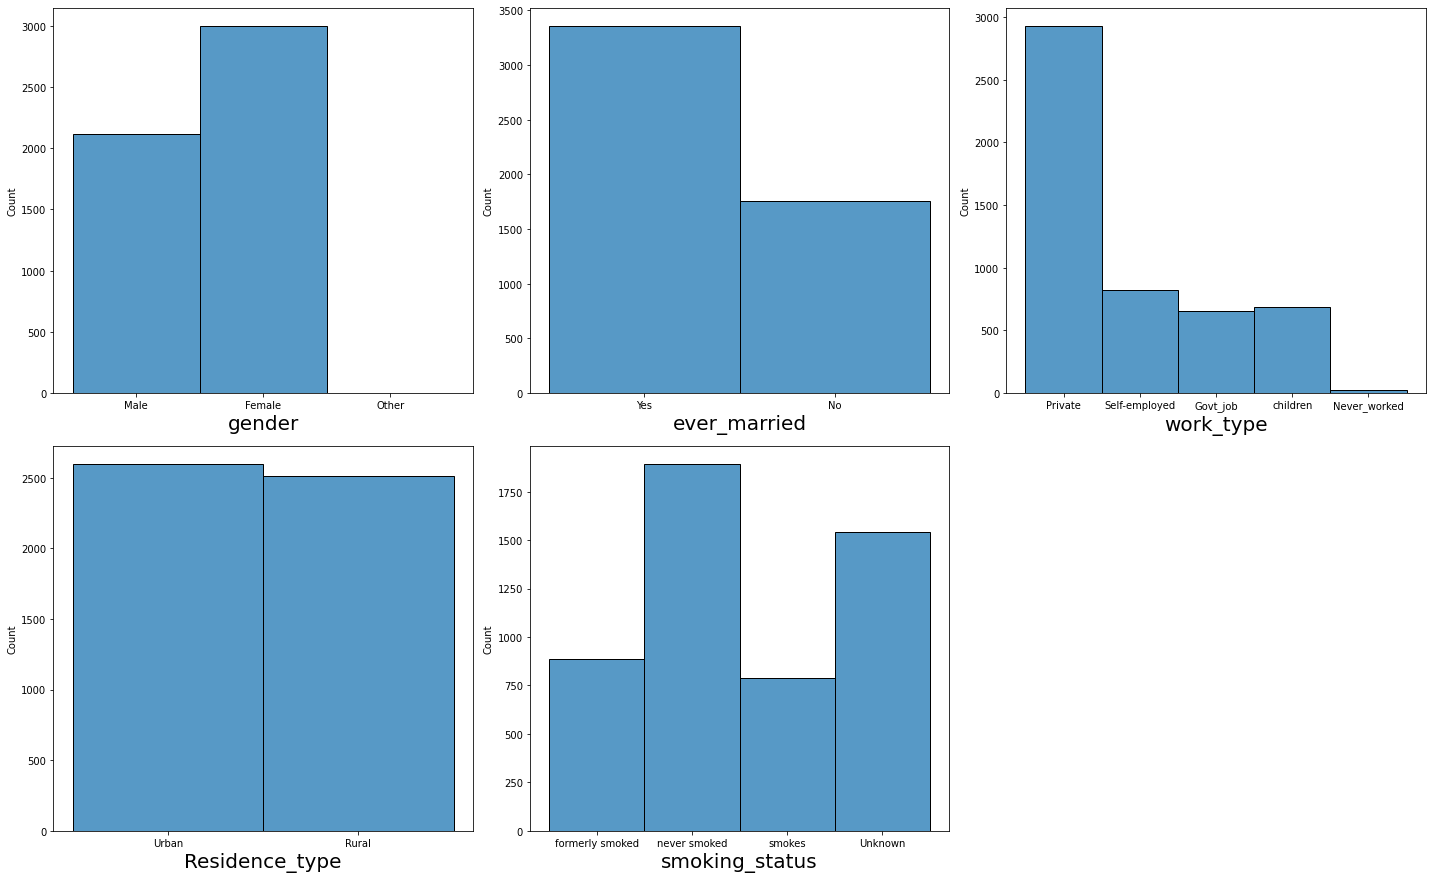

In [ ]:
plt.figure(figsize = (20,30), facecolor = "white")
plotnumber = 1
for column in df_categorical:
  if plotnumber <= 15:
    ax = plt.subplot(5,3,plotnumber)
    sns.histplot(df_categorical[column])
    plt.xlabel(column, fontsize=20)
  plotnumber += 1
plt.tight_layout()

### The data in categorical values is almost well disributed, work tipe has a bias ti private, which is correct.

### **EDA With pandas profiling:**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 21.0 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 27.9 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=6ce2cc5b4d0e11b0d84dd3eed6f4fae84083d377227675df9a3e6e3c6187ca7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-fmjddcxq/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

In [ ]:
profile = ProfileReport(df)
profile.to_file(output_file = "stroke.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

## **Label Encoding:** Remove all tags and replace them for categorical numbers to make it easy for normalization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### All dtype as object should be encoded as numbers

In [ ]:
enc = LabelEncoder()

### encoding categorical values

In [ ]:
gender = enc.fit_transform(df["gender"])
ever_married = enc.fit_transform(df["ever_married"])
work_type = enc.fit_transform(df["work_type"])
Residence_type = enc.fit_transform(df["Residence_type"])
smoking_status = enc.fit_transform(df["smoking_status"])

### Replacing encoding in data frame

In [ ]:
df["gender"]= gender
df["ever_married"]= ever_married
df["work_type"]= work_type
df["Residence_type"]= Residence_type
df["smoking_status"]= smoking_status

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   int64  
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 399.3 KB


### Now all are numbers

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1


## **Normalize data:** Make data bell shaped, expresed in std dev of each own mean, and independient of units, easy to work with.

In [ ]:
std = StandardScaler()

In [ ]:
df_std = std.fit_transform(df)

In [ ]:
df_std

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -1.28511375, -0.22632726]])

## **Discusion**
The data is ready for the next step, modelling. 
Throughout the EDA 2 variables were dropped, one identified each data, and the other was poorly correlated with the target. In the following steps likely, we will use logistic regression with 9 statistical features for one target. 
the most essential features, like glucose, hypertension and heart disease, are imbalanced, as well as the target. We likely will use data augmenting to fill data and make the model more accurate.  (78 words)

